In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

from rank_bm25 import BM25Okapi

# self defined
from models import Bert_model

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_hdf('metadata/preprocessed.h5')
df.head()

,paper_id,body_text,methods,results,source,title,doi,abstract,publish_time,authors,journal,arxiv_id,url,publish_year,is_covid19,study_design
0,3cdc48bb9e40afd30a59463b7872761a726998c8,NDV (Roakin strain) was obtained from Dr. D. J...,NDV (Roakin strain) was obtained from Dr. D. J...,Adult house flies harbored Newcastle Disease v...,PMC,Experimental Evaluation of Musca domestica (Di...,10.1093/jmedent/44.4.666,"House flies, Musca domestica L. (Diptera: Musc...",2007-07-01,"Watson, D. Wes; Niño, Elina L.; Rochon, Katery...",J Med Entomol,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,2007,False,[]
1,d99acb4e99be7852aa61a688c9fbd38d44b5a252,Live attenuated viruses have been developed an...,RSV A2 strain was obtained from ATCC (Manassas...,The reverse genetics system for measles Edmons...,PMC,Evaluation of Measles Vaccine Virus as a Vecto...,10.2174/1874357901206010012,Live attenuated recombinant measles vaccine vi...,2012-02-16,"Mok, Hoyin; Cheng, Xing; Xu, Qi; Zengel, James...",Open Virol J,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2012,False,"['truncated', 'gamma', 'protocol']"
2,748d4c57fe1acc8d9d97cf574f7dea5296f9386c,Ebola virus (EBOV) and other members of the fa...,U2OS human osteosarcoma cells were cultured in...,For evaluating EBOV GP triggering under biosaf...,PMC,Direct Visualization of Ebola Virus Fusion Tri...,10.1128/mbio.01857-15,Ebola virus (EBOV) makes extensive and intrica...,2016-02-09,"Spence, Jennifer S.; Krause, Tyler B.; Mittler...",mBio,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,2016,False,"['truncated', 'heterogeneity']"
3,b891efc6e1419713b05ff7d89b26d260478c28df,To the Editor:\nChina has the world's second l...,NaN,NaN,PMC,Tuberculosis prevention in healthcare workers ...,10.1183/23120541.00015-2015,BSL3 and respiratory isolation wards protect h...,2015-08-21,"Deng, Yunfeng; Li, Yan; Wang, Fengtian; Gao, D...",ERJ Open Res,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,2015,False,[]
4,353852971069ad5794445e5c1ab6077ce23da75d,Coronavirus disease 2019 (COVID-19) has spread...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,-1,True,[]


# BM25

In [3]:
abstract_bm25 = BM25Okapi(df['abstract'].dropna())
abstract_bm25.corpus_size

41062

0.0 25.56885220118872
effective min score: 4.341793002555567
effective max score: 25.527117429704845


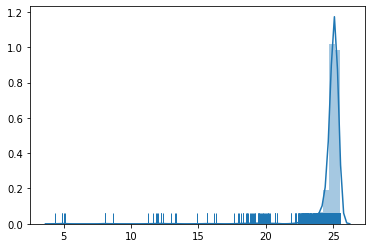

In [4]:
""" 測試 query:'covid' 與 label:'is_covid19' 的關聯程度"""

query_result = abstract_bm25.get_scores('covid')
print(query_result.min(), query_result.max())

is_covid19_notna_indicator = df.loc[df['abstract'].notna(), 'is_covid19']
is_covid19_notna_scores = query_result[is_covid19_notna_indicator]

print('effective min score:', np.min(is_covid19_notna_scores))
print('effective max score:', np.max(is_covid19_notna_scores))
sns.distplot(is_covid19_notna_scores, rug=True)